In [19]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

In [2]:
df = pd.read_parquet("C:\\Users\\Tobi\\Desktop\\New folder\\git\\Energy_Load_Profile_Classification\\Energy_Load_Profile_Classification\\main.parquet")

In [3]:
df = df[['Time','system_kW']]

In [4]:
df['Time'] = pd.to_datetime(df['Time'])

In [68]:
# df['new_date'] = [d.date() for d in df['Time']]
# df['new_time'] = [d.time() for d in df['Time']]

In [69]:
# import pandas as pd

# # Get week number, with pd.DateOffset used to start the week on Sunday
# week_date_values = df["Time"].dt.isocalendar()
# df["week_date"] = (df['Time'] - pd.to_timedelta(df['Time'].dt.dayofweek, unit='d') + pd.DateOffset(days=-1)).dt.strftime("%Y-%m-%d")

# # Combine with "(week n)" values
# df["week_date"] = df["week_date"] + " " + "(week " + week_date_values["week"].astype(str) + ")"
# df

### taking the max, min and mean by hour distance

In [5]:
# data re-sampled based on an hour
df_by_hr_max = df.resample('H', on='Time').system_kW.max()

df_by_hr_max = pd.DataFrame(df_by_hr_max).reset_index()

df_by_hr_max.rename(columns = {'system_kW':'Max_Load'}, inplace = True)

import pandas as pd

# Get week number, with pd.DateOffset used to start the week on Sunday
week_date_values = df_by_hr_max["Time"].dt.isocalendar()
df_by_hr_max["week_date"] = (df_by_hr_max['Time'] - pd.to_timedelta(df_by_hr_max['Time'].dt.dayofweek, unit='d') + pd.DateOffset(days=-1)).dt.strftime("%Y-%m-%d")

# Combine with "(week n)" values
df_by_hr_max["week_date"] = df_by_hr_max["week_date"] + " " + "(week " + week_date_values["week"].astype(str) + ")"
df_by_hr_max

# data re-sampled based on an hour
df_by_hr_min = df.resample('H', on='Time').system_kW.min()

df_by_hr_min = pd.DataFrame(df_by_hr_min).reset_index()

df_by_hr_min.rename(columns = {'system_kW':'Min_Load'}, inplace = True)

import pandas as pd

# Get week number, with pd.DateOffset used to start the week on Sunday
week_date_values = df_by_hr_min["Time"].dt.isocalendar()
df_by_hr_min["week_date"] = (df_by_hr_min['Time'] - pd.to_timedelta(df_by_hr_min['Time'].dt.dayofweek, unit='d') + pd.DateOffset(days=-1)).dt.strftime("%Y-%m-%d")

# Combine with "(week n)" values
df_by_hr_min["week_date"] = df_by_hr_min["week_date"] + " " + "(week " + week_date_values["week"].astype(str) + ")"
Min_Load = df_by_hr_min.Min_Load.to_list()

# data re-sampled based on an hour
df_by_hr_mean = df.resample('H', on='Time').system_kW.mean()

df_by_hr_mean = pd.DataFrame(df_by_hr_mean).reset_index()

df_by_hr_mean.rename(columns = {'system_kW':'Mean_Load'}, inplace = True)

import pandas as pd

# Get week number, with pd.DateOffset used to start the week on Sunday
week_date_values = df_by_hr_mean["Time"].dt.isocalendar()
df_by_hr_mean["week_date"] = (df_by_hr_mean['Time'] - pd.to_timedelta(df_by_hr_mean['Time'].dt.dayofweek, unit='d') + pd.DateOffset(days=-1)).dt.strftime("%Y-%m-%d")

# Combine with "(week n)" values
df_by_hr_mean["week_date"] = df_by_hr_mean["week_date"] + " " + "(week " + week_date_values["week"].astype(str) + ")"
Mean_Load = df_by_hr_mean.Mean_Load.to_list()

df_max_min_mean = df_by_hr_max.assign(Min_Load=Min_Load,Mean_Load=Mean_Load)

df_hr_max_min_mean = df_max_min_mean[['Time','week_date','Max_Load','Min_Load','Mean_Load']]

df_hr_max_min_mean

,Time,week_date,Max_Load,Min_Load,Mean_Load
0,2022-09-17 12:00:00,2022-09-11 (week 37),46.666,29.376,37.835000
1,2022-09-17 13:00:00,2022-09-11 (week 37),51.045,31.066,43.259552
2,2022-09-17 14:00:00,2022-09-11 (week 37),45.432,35.635,40.673883
3,2022-09-17 15:00:00,2022-09-11 (week 37),47.489,36.948,43.198733
4,2022-09-17 16:00:00,2022-09-11 (week 37),59.146,36.043,46.881117
...,...,...,...,...,...
3271,2023-01-31 19:00:00,2023-01-29 (week 5),87.146,72.626,79.960733
3272,2023-01-31 20:00:00,2023-01-29 (week 5),82.882,70.813,77.210667
3273,2023-01-31 21:00:00,2023-01-29 (week 5),76.380,57.502,66.348317
3274,2023-01-31 22:00:00,2023-01-29 (week 5),62.340,52.269,57.426000


### Working Daily

In [6]:
# df['new_date'] = [d.date() for d in df['Time']]
# df['new_time'] = [d.time() for d in df['Time']]

# df

# df_day_mean = df.groupby(['new_date']).mean().reset_index()['system_kW'].to_list()
# df_day_min = df.groupby(['new_date']).min().reset_index()['system_kW'].to_list()
# df_day_max = df.groupby(['new_date']).max().reset_index()['system_kW'].to_list()
# df_day_time = df.groupby(['new_date']).max().reset_index()['Time'].to_list()

# df_day_mean_min_max = pd.DataFrame(list(zip(df_day_time,df_day_mean, df_day_min,df_day_max)),columns =['Time', 'mean','min','max'])
# df_day_mean_min_max


# import pandas as pd

# # Get week number, with pd.DateOffset used to start the week on Sunday
# week_date_values = df_day_mean_min_max["Time"].dt.isocalendar()
# df_day_mean_min_max["week_date"] = (df_day_mean_min_max['Time'] - pd.to_timedelta(df_by_hr_mean['Time'].dt.dayofweek, unit='d') + pd.DateOffset(days=-1)).dt.strftime("%Y-%m-%d")

# # Combine with "(week n)" values
# df_day_mean_min_max["week_date"] = "week " + week_date_values["week"].astype(str)

# # 
# df_day_mean_min_max['WeekDay'] = df_day_mean_min_max['Time'].dt.day_name()

# df_day_mean_min_max

In [128]:
# df_day_mean_min_max.to_csv('df_day_mean_min_max.csv', index=False)

In [7]:
df_hr_max_min_mean['hour_of_the_week'] = df_hr_max_min_mean['Time'].dt.dayofweek * 24 + (df_hr_max_min_mean['Time'].dt.hour + 1)
df_hr_max_min_mean['WeekDay'] = df_hr_max_min_mean['Time'].dt.day_name()
df_hr_max_min_mean
df_hr_max_min_mean[df_hr_max_min_mean['hour_of_the_week']==168]

<ipython-input-7-d01718b81653>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_max_min_mean['hour_of_the_week'] = df_hr_max_min_mean['Time'].dt.dayofweek * 24 + (df_hr_max_min_mean['Time'].dt.hour + 1)
<ipython-input-7-d01718b81653>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_max_min_mean['WeekDay'] = df_hr_max_min_mean['Time'].dt.day_name()


,Time,week_date,Max_Load,Min_Load,Mean_Load,hour_of_the_week,WeekDay
35,2022-09-18 23:00:00,2022-09-11 (week 37),39.274,31.712,36.199967,168,Sunday
203,2022-09-25 23:00:00,2022-09-18 (week 38),39.167,29.281,35.774033,168,Sunday
371,2022-10-02 23:00:00,2022-09-25 (week 39),38.595,31.384,36.514550,168,Sunday
539,2022-10-09 23:00:00,2022-10-02 (week 40),39.584,31.090,36.110450,168,Sunday
707,2022-10-16 23:00:00,2022-10-09 (week 41),44.441,29.083,39.964158,168,Sunday
875,2022-10-23 23:00:00,2022-10-16 (week 42),39.407,34.477,37.390667,168,Sunday
1043,2022-10-30 23:00:00,2022-10-23 (week 43),41.596,27.871,36.129404,168,Sunday
1211,2022-11-06 23:00:00,2022-10-30 (week 44),43.618,37.678,40.274617,168,Sunday
1379,2022-11-13 23:00:00,2022-11-06 (week 45),46.689,33.851,41.441217,168,Sunday
1547,2022-11-20 23:00:00,2022-11-13 (week 46),43.742,39.032,42.153094,168,Sunday


### Visualization

In [13]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [10]:
init_notebook_mode(connected=True)

In [11]:
cf.go_offline()

In [136]:
df = df_hr_max_min_mean[['hour_of_the_week','Mean_Load']]
df

,hour_of_the_week,Mean_Load
0,133,37.835000
1,134,43.259552
2,135,40.673883
3,136,43.198733
4,137,46.881117
...,...,...
3271,44,79.960733
3272,45,77.210667
3273,46,66.348317
3274,47,57.426000


In [137]:
df.iplot()

In [138]:
df.iplot(kind='bar', x='hour_of_the_week',y='Mean_Load')

### Model Development

In [152]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)
from sklearn.utils.validation import check_array

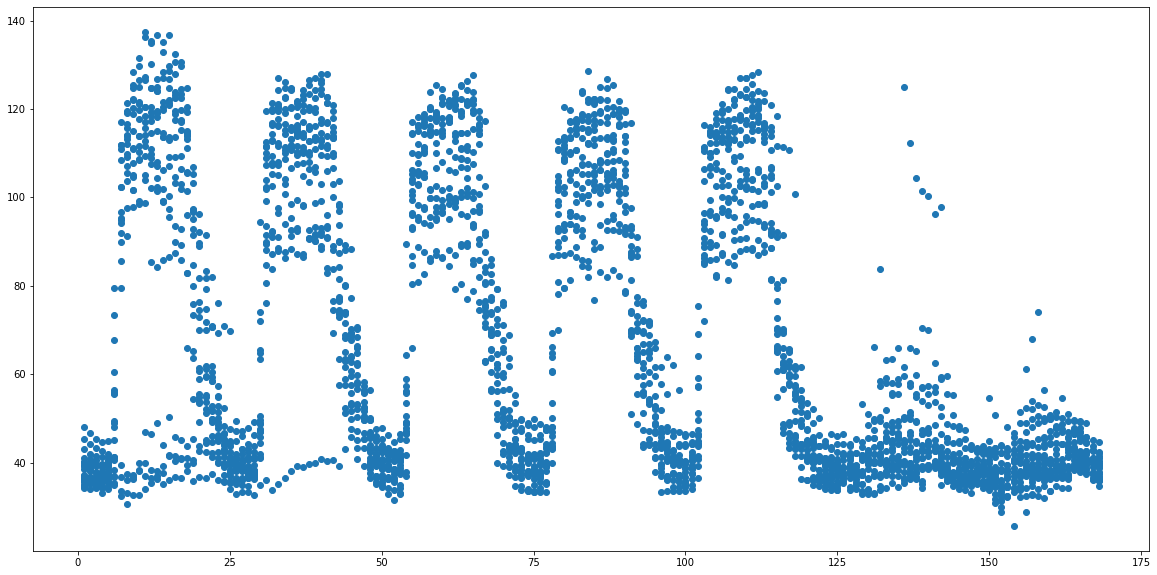

In [140]:
plt.scatter(df['hour_of_the_week'],df['Mean_Load'])

In [141]:
df.fillna(value = 0, inplace=True)

In [142]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [143]:
y_predict = km.fit_predict(df[['hour_of_the_week','Mean_Load']])
y_predict

array([0, 0, 0, ..., 2, 2, 2])

In [144]:
# df[["hour_of_the_week","Mean_Load"]].to_numpy()

In [145]:
df['cluster1'] = y_predict
df.head()

,hour_of_the_week,Mean_Load,cluster1
0,133,37.835000,0
1,134,43.259552,0
2,135,40.673883,0
3,136,43.198733,0
4,137,46.881117,0


No handles with labels found to put in legend.


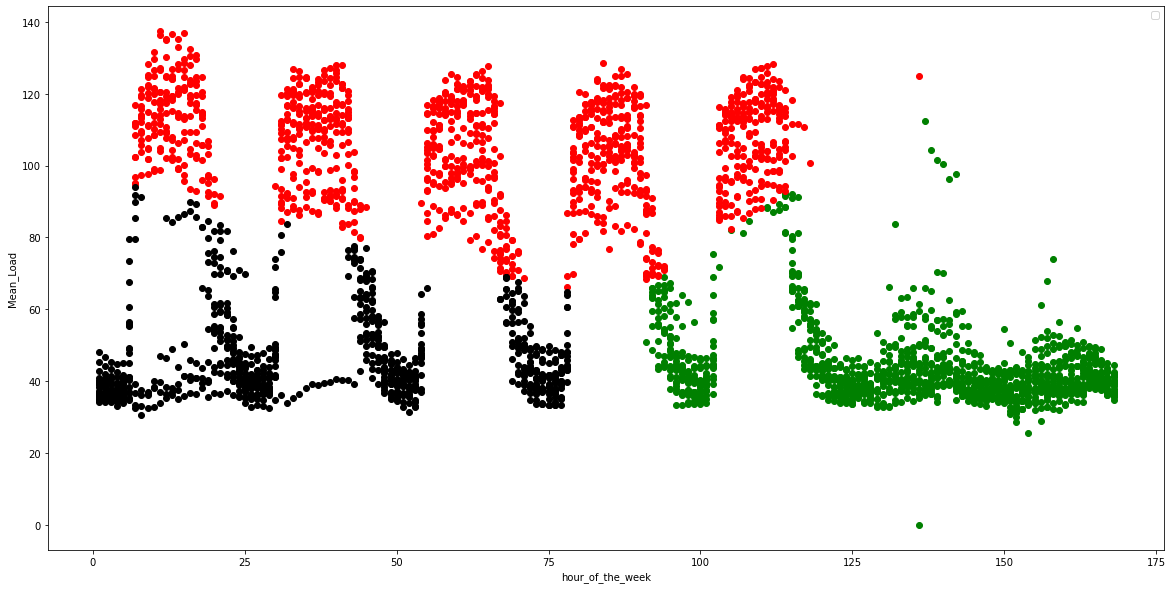

In [146]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]

plt.scatter(df1.hour_of_the_week, df1['Mean_Load'], color='green')
plt.scatter(df2.hour_of_the_week, df2['Mean_Load'], color='red')
plt.scatter(df3.hour_of_the_week, df3['Mean_Load'], color='black')

plt.xlabel('hour_of_the_week')
plt.ylabel('Mean_Load')
plt.legend()

### MinMax Scalarizing

In [178]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = df_hr_max_min_mean[['hour_of_the_week','Mean_Load']]
df.fillna(value=0, inplace=True)

scaler = MinMaxScaler()

# Fit and transform the scaler on the 'hour_of_the_week' and 'Mean_Load' columns
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# View the resulting dataframe with the scaled columns
df


,hour_of_the_week,Mean_Load
0,0.790419,0.275323
1,0.796407,0.314798
2,0.802395,0.295982
3,0.808383,0.314355
4,0.814371,0.341151
...,...,...
3271,0.257485,0.581870
3272,0.263473,0.561858
3273,0.269461,0.482813
3274,0.275449,0.417886


In [179]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['hour_of_the_week','Mean_Load']])
y_predict

array([2, 2, 2, ..., 0, 0, 0])

In [180]:
km.cluster_centers_

array([[0.22727273, 0.33820546],
       [0.37221115, 0.77198134],
       [0.80267372, 0.31645899]])

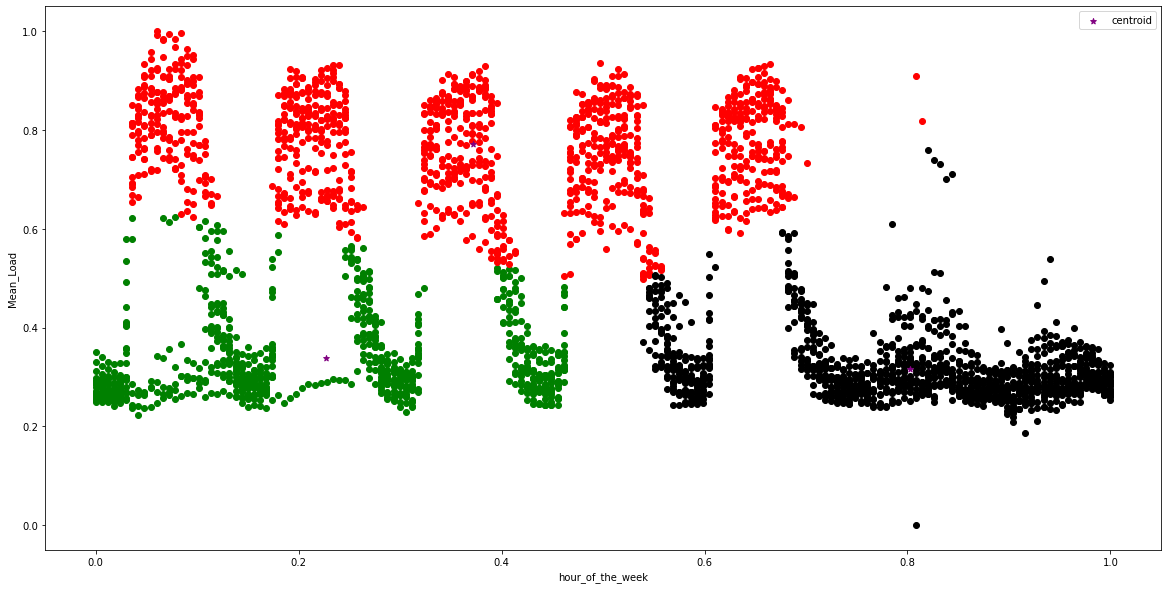

In [181]:
df['cluster2'] = y_predict
df1 = df[df.cluster2==0]
df2 = df[df.cluster2==1]
df3 = df[df.cluster2==2]

plt.scatter(df1.hour_of_the_week, df1['Mean_Load'], color='green')
plt.scatter(df2.hour_of_the_week, df2['Mean_Load'], color='red')
plt.scatter(df3.hour_of_the_week, df3['Mean_Load'], color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('hour_of_the_week')
plt.ylabel('Mean_Load')
plt.legend()

In [182]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['hour_of_the_week','Mean_Load']])
    sse.append(km.inertia_)

In [183]:
sse

[456.86510323145404,
 211.57140818003427,
 109.29913682505881,
 72.14862216424558,
 51.07096920075301,
 43.568969710004126,
 36.39027934395963,
 31.707910037602524,
 27.152935244329186]

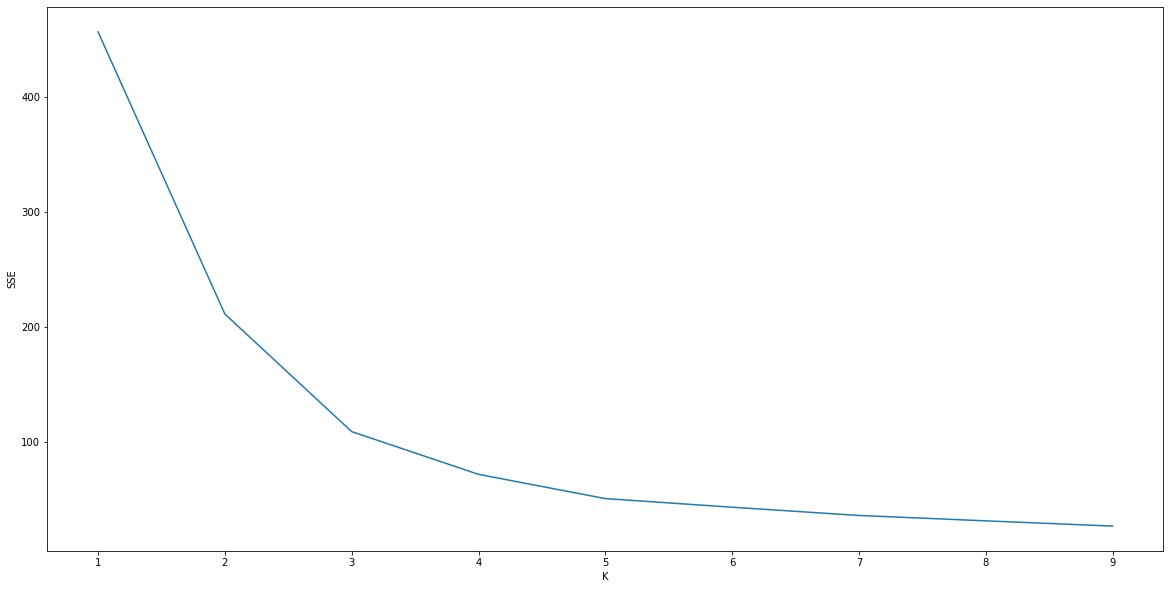

In [184]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)